In [1]:
import sys
sys.path.append('../..')

In [2]:
import sbi4abm.sbi
from sbi4abm.sbi import analysis, utils
from sbi4abm.utils import sampling, plotting
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle
import seaborn as sns

/home/pmms2/sbi4abm/py_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
matplotlib.rc('text', usetex=True)
plt.rcParams.update({
  "text.usetex": False,
  "font.family": "serif"
})
plt.rcParams.update({
    'text.latex.preamble':r"\usepackage{amsmath}"+"\n"+r"\usepackage{bm}"
})

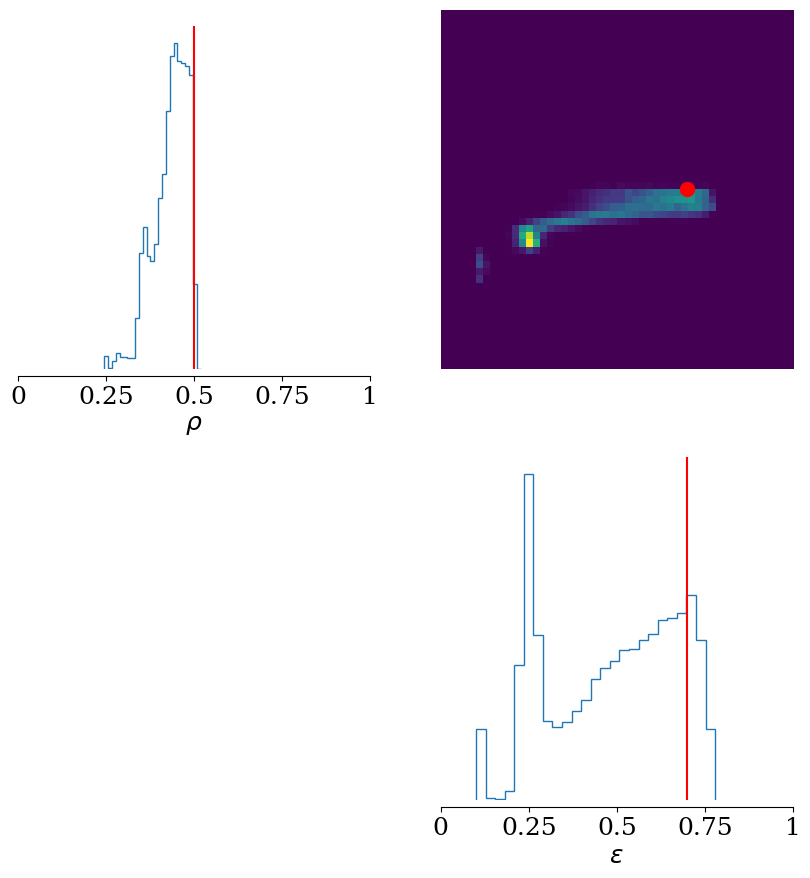

In [4]:
# resnet
segregation = np.loadtxt("../../exp_dir/segregation/resnet_100000/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(segregation, limits=[[0,1], [0, 1]], points=[np.array([0.5, 0.7])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


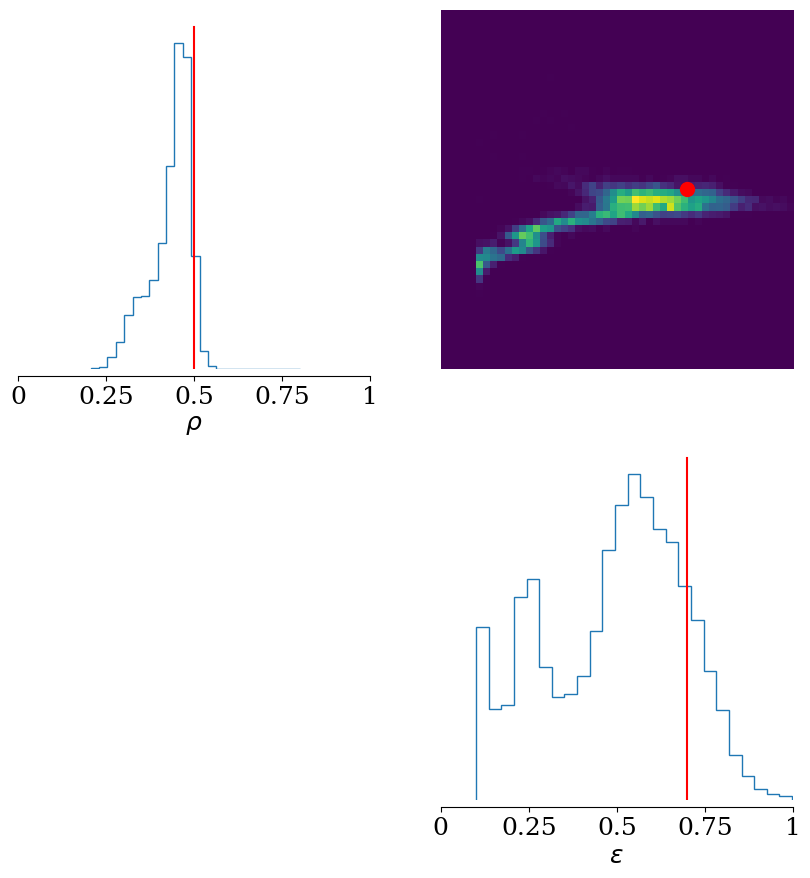

In [4]:
# maf
segregation = np.loadtxt("../../exp_dir/segregation/maf_100000/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(segregation, limits=[[0,1], [0, 1]], points=[np.array([0.5, 0.7])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


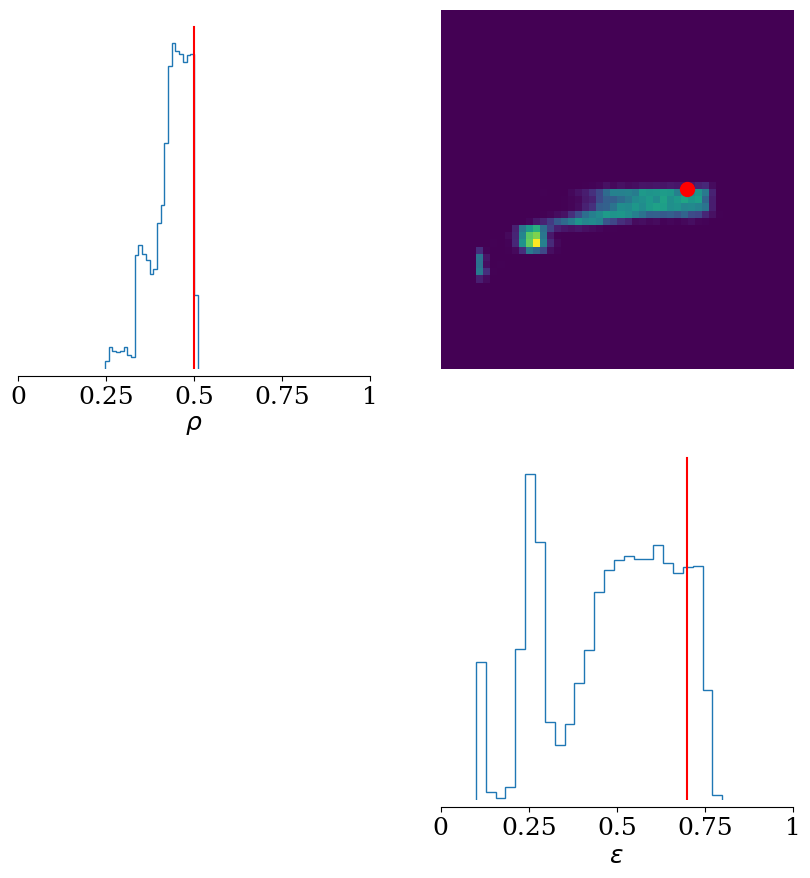

In [6]:
# resnet -> new architecture
segregation = np.loadtxt("../../exp_dir/segregation/1714740228.3274262/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(segregation, limits=[[0,1], [0, 1]], points=[np.array([0.5, 0.7])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


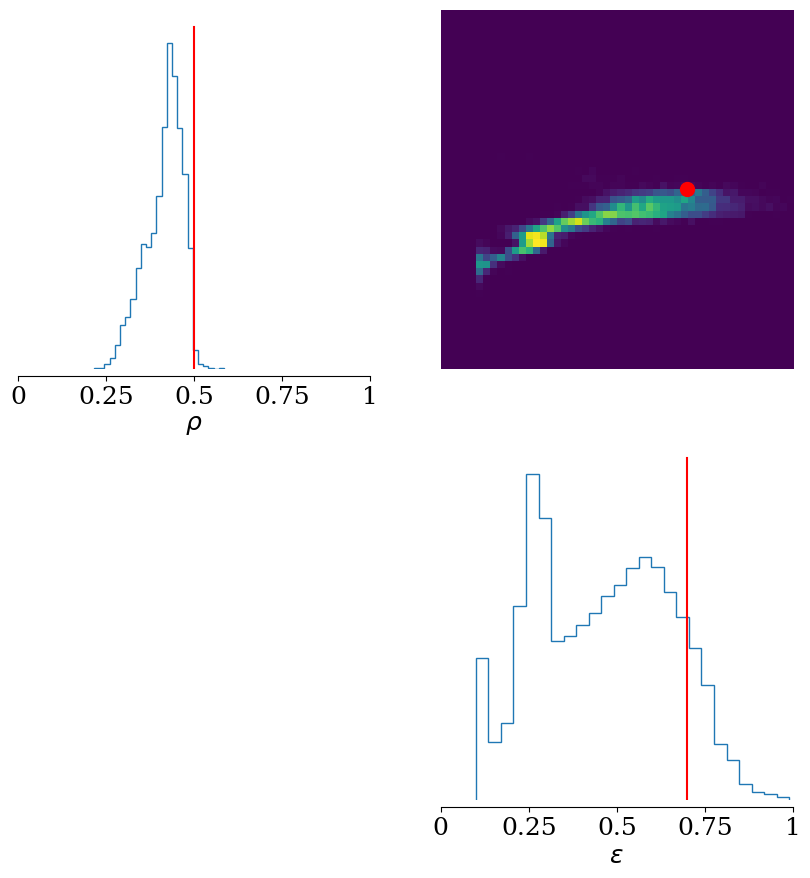

In [5]:
# maf -> new arch final
segregation = np.loadtxt("../../exp_dir/segregation/1716030477.2453024/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(segregation, limits=[[0,1], [0, 1]], points=[np.array([0.5, 0.7])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


# Posterior Predictive Checks 

In [5]:
from sbi4abm.utils import io

segregationf = io.load_task('segregation')

6846.573117254528 6143.941658145466 1716212911.518464


In [6]:
idxs = np.random.randint(segregation.shape[0], size=1000)

### Posterior Predictives

In [7]:
pps = []
for idx in idxs:
    data = segregationf[0](list(segregation[idx]))
    pps.append(data)

THETAs:  {'steps': 200, 'want_similar': 0.3430132567882538, 'density': 0.30558404326438904}
Completed: 100 steps
Run time: 0:00:05.449366
Simulation finished
THETAs:  {'steps': 200, 'want_similar': 0.46906790137290955, 'density': 0.5847500562667847}
Completed: 131 steps
Run time: 0:00:16.447041
Simulation finished
THETAs:  {'steps': 200, 'want_similar': 0.4819961190223694, 'density': 0.4894671142101288}
Completed: 34 steps

KeyboardInterrupt: 

In [ ]:
posterior_segregation = []
for pp in pps:
    if pp.ndim == 2:
        pp = pp[0]
    posterior_segregation.append(pp[-1])
    

### Prior Predictives

In [ ]:
pps_ = []
for idx in idxs:
    data = segregationf[0](list(segregationf[1].sample().tolist()))
    pps_.append(data)

NameError: name 'idxs' is not defined

In [ ]:
prior_segregation = []
for pp in pps_:
    if pp.ndim == 2:
        pp = pp[0]
    prior_segregation.append(pp[-1])
    

NameError: name 'pps_' is not defined

### Observation

In [ ]:
observation_segregation = segregationf[2][-1]

### Plots

In [ ]:
from matplotlib.lines import Line2D
import matplotlib.patches as patches

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(posterior_segregation, bins=30, color='b', alpha=0.2)
plt.hist(prior_segregation, bins=30, color='r', alpha=0.2)
plt.axvline(observation_segregation, c='g')
plt.xlabel(r"Coherence", fontsize=18)
# plt.legend([r"Observed value", r"Prior predictive samples", r"Posterior predictive samples"], fontsize=18)

handles = [patches.Rectangle((0,0),0,0,facecolor='r',
                             label=r"${\rm Prior}$ ${\rm predictive}$ ${\rm samples}$", alpha=0.2),
           patches.Rectangle((0,0),0,0,facecolor='b',
                             label=r"${\rm Posterior}$ ${\rm predictive}$ ${\rm samples}$", alpha=0.2),
           Line2D([0], [0], color='g', label=r"${\rm Observed}$ ${\rm values}$", lw=2, linestyle="-")]

plt.legend(handles=handles, fontsize=18)

# Sensitivity Analysis

In [14]:
file_name = "maf_100000"
with open(f"../../exp_dir/segregation/{file_name}/posteriors.pkl", 'rb') as file:
    posterior = pickle.load(file)
    posterior = posterior[0]

Drawing 200 posterior samples:   0%|          | 0/200 [00:00<?, ?it/s]

Drawing 200 posterior samples: 9844it [00:02, 4498.80it/s]                       


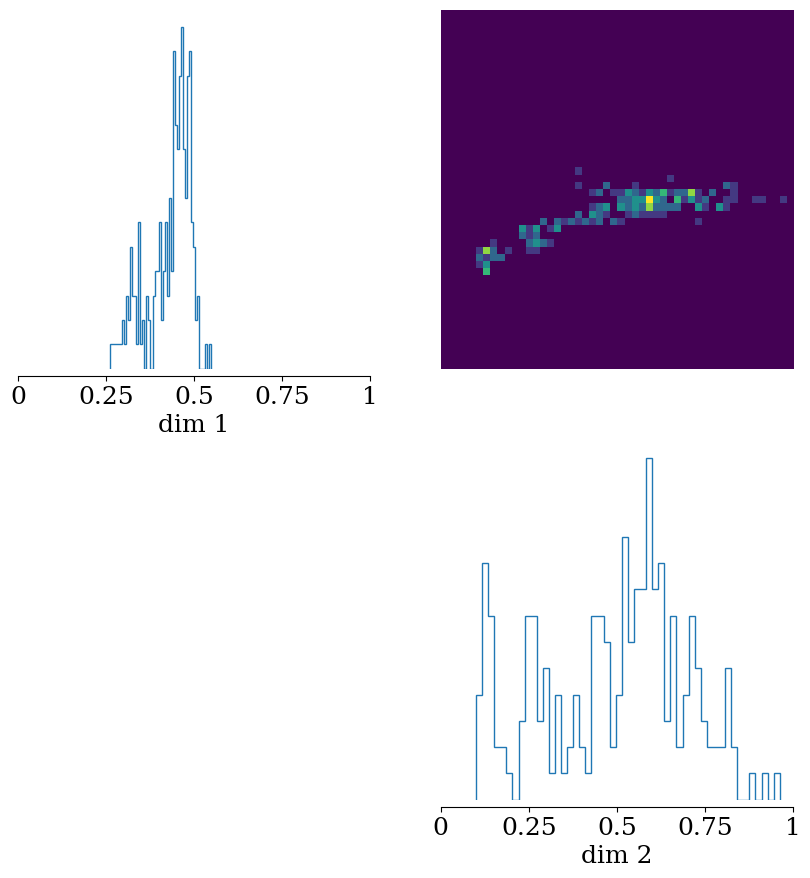

In [15]:
from sbi4abm.sbi.analysis import ActiveSubspace, pairplot

posterior_samples = posterior.sample((200,))
_ = pairplot(posterior_samples, limits=[[0,1], [0, 1]], figsize=(10, 10))

In [16]:
sensitivity = ActiveSubspace(posterior)
e_vals, e_vecs = sensitivity.find_directions(posterior_log_prob_as_property=True)

print("Eigenvalues: \n", e_vals, "\n")
print("Eigenvectors: \n", e_vecs)

Drawing 1000 posterior samples: 10621it [00:03, 2971.73it/s]                       


Eigenvalues: 
 tensor([4.7161e-05, 6.7709e-04]) 

Eigenvectors: 
 tensor([[-0.0315, -0.9995],
        [-0.9995,  0.0315]])
